<a href="https://colab.research.google.com/github/Jittiya/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'Jittiya Sirithammajak'
ID = '6230210433'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

021:22:18


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,3.194903,-2.484340,9.046534,5.526724,-7.200411,-5.422545,6.863710,-2.819618,-1.272393,-7.801303,3.958371,8.572270,8.361012,-4.429934,4.652552,-7.054646,-3.261196,-1.723801,2.323923,-0.561950,-0.579829,0.106464,-4.968681,2.532319
1,-0.213970,3.045143,-4.711877,1.873009,-0.599405,-5.617942,8.652119,-2.984660,-7.625184,-8.832367,-0.548511,-7.382334,4.673768,-9.341331,-7.842799,-8.708402,7.103475,4.578204,8.623073,7.470627,-6.989783,0.296539,6.090287,3.482695
2,-1.979782,-4.234113,6.069967,-3.083000,-7.008880,-3.086111,1.928047,-6.068686,-4.005132,6.158407,-0.383451,5.053533,9.074643,-5.802774,1.036415,-7.645215,9.827508,6.990707,3.178064,-7.804276,10.920628,-9.738056,-8.468227,-46.690281
3,0.891762,-5.713522,-2.516742,-6.357597,-8.092526,6.917633,5.331113,-9.361055,-3.762856,-3.937647,5.313438,0.836192,-1.030030,-4.608901,0.232444,8.016438,9.761336,-8.898094,1.344340,-10.271389,6.805579,2.809819,-11.427045,16.049094
4,-3.019054,2.111087,-0.041213,4.371200,-4.707153,-4.773634,7.302765,8.429015,1.500328,9.601859,6.408265,8.036825,1.085440,-7.069588,1.090082,10.219567,-2.069758,3.511844,-8.153129,-3.323127,-6.466091,7.969829,4.222173,41.849147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.551409,-2.593693,-9.460313,7.666266,8.326343,8.742272,9.192368,-10.023568,8.308823,-7.588181,10.580945,5.089918,7.325876,6.778694,8.851949,3.778175,6.929695,-8.678640,3.897597,6.768477,7.666765,-10.095008,-5.187386,-48.475041
9996,-1.892205,-3.202756,5.180795,-0.702603,-5.345112,-4.413034,3.348990,-5.589029,-2.968417,7.388957,0.499593,3.935998,9.548590,-5.225462,0.176967,-6.254073,9.367047,6.924998,2.795622,-7.109549,9.215384,-8.584671,-6.405511,-40.923353
9997,2.281352,-4.642635,-2.566606,-3.402290,-6.133717,5.704547,5.233088,-9.440874,-3.886720,-3.985638,4.023319,-1.960977,-0.468020,-4.943990,1.311771,7.310821,9.513713,-8.942738,1.474599,-9.703660,6.691818,2.518505,-9.285271,14.592527
9998,0.046269,-3.550455,-3.713558,-5.652540,-9.502716,5.354921,3.992697,-10.604678,-5.367437,-5.581199,5.106539,-1.281593,-2.528070,-6.575592,1.445353,7.182034,9.015343,-8.080399,0.323079,-8.678822,6.641757,3.538480,-7.100910,19.692400


In [6]:
Name  #เรียกดูชื่อของข้อมูลว่าตรงกับที่ใส่ไปหรือไม่

'Jittiya Sirithammajak'

In [7]:
ID #เรียกดู ID ของข้อมูลว่าตรงกับที่ใส่ไปหรือไม่

'6230210433'

In [11]:
Data.shape   #เรียกดูขนาดของข้อมูล Data ว่ามีกี่ตัวและกี่ dimention

(10000, 24)

In [16]:
import pandas as pd

- ลอง plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f830acf6e50>,
      dtype=object)

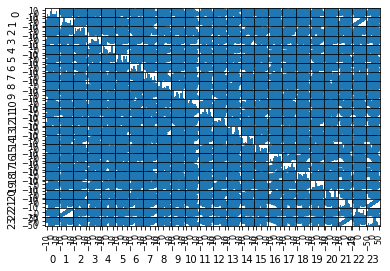

In [18]:
#pd.plotting.scatter_matrix(Data)

เนื่องจากข้อมูลที่ได้มีค่าซ้ำกันเยอะ

- ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [12]:
corr = np.corrcoef(Data.to_numpy().T)  #เรียกใช้คำสั่ง correlation

In [13]:
corr.shape  #เรียกดูขนาดของ Data เมื่อใช้คำสั่ง correlation แล้ว

(24, 24)

In [19]:
corr  #เรียกดูค่า correlation

array([[ 1.        ,  0.18335177,  0.2240476 ,  0.15627875, -0.12517472,
         0.12645987,  0.10648143, -0.13640438,  0.00293363, -0.32972006,
        -0.12623187,  0.01111455,  0.15857701,  0.20240345,  0.07918446,
        -0.26915762, -0.02372508,  0.15115922, -0.01005665, -0.03825634,
         0.09098866, -0.05086225,  0.18335177, -0.05086225],
       [ 0.18335177,  1.        ,  0.32704597,  0.09108711,  0.00999514,
        -0.07497375, -0.36645677,  0.39767903, -0.04786276, -0.03057504,
        -0.29818791, -0.0849468 , -0.01551588,  0.02118802,  0.24365076,
        -0.16181281, -0.12873383,  0.15726713, -0.20832192, -0.03943818,
         0.04668214,  0.20729742,  1.        ,  0.20729742],
       [ 0.2240476 ,  0.32704597,  1.        , -0.00241751, -0.41348103,
        -0.52329981, -0.30193309,  0.12671032, -0.29006621, -0.04247862,
        -0.12885377,  0.18390584, -0.04204803, -0.12525977,  0.57040577,
        -0.19802438,  0.04813889,  0.43379205,  0.32877498, -0.35301909,
  

In [24]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')
#วนลูปไปรอบๆในตัว correlation matrix แล้วดูค่าที่เป็น 1 โดยที่คอลัมน์ i กับ j ไม่เท่ากัน เพื่อดูค่า correlation ที่ซ้ำกัน

- จากการวนลูปรอบๆ correlation matrix พบว่าไม่มีค่า correlation ใดที่ซ้ำกันเลย จึงสามารถนำข้อมูล Data นี้ไปใช้ได้เลยโดยไม่ต้องตัดข้อมูลตัวใดออก

# ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

**Import**

In [23]:
from sklearn.cluster import KMeans 

**Define**

In [25]:
kmeans = KMeans(n_clusters=3, random_state=2021)
# define โดยกำหนดค่า k ที่ต้องการ
# ให้สุ่มที่จุดเดียวกัน ดังนั้นข้อมูลจะเหมือนกัน

**Fit - Transform**

In [26]:
kmeans.fit(Data)
# คำนวณหาจุด cluter centers ของข้อมูล Data ด้วยวิธี K-means clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [27]:
kmeans.cluster_centers_
# แสดง จุด cluster centers ที่คำนวณออกมาได้

array([[ 2.81591525e+00,  2.62326375e+00,  1.11018768e+00,
         3.52695371e+00,  2.26601981e+00,  1.14570648e+00,
         1.48031039e+00,  4.92805729e-02, -2.33692243e+00,
        -1.78840877e+00, -2.55659701e+00, -1.28818706e+00,
         2.20815940e+00, -4.14732835e-01,  7.69223916e-01,
        -5.14256303e+00,  3.30065303e+00,  3.13858874e+00,
         8.58856704e-02,  6.68184839e-01,  3.96314077e-01,
         1.66532578e-02,  5.24652751e+00,  2.08326629e+00],
       [-1.03727547e+00, -4.21976100e+00, -1.30921058e+00,
         2.31064469e+00,  1.04243143e+00,  2.90189448e+00,
         5.88442967e+00, -6.86494396e+00,  1.40792766e+00,
        -7.72495655e-01,  5.17799559e+00,  4.98967220e+00,
         7.90521260e+00,  2.53607703e-01,  4.39625689e+00,
        -1.27786554e+00,  8.67118107e+00, -1.59234223e+00,
         3.28809073e+00,  5.06375643e-01,  8.61877454e+00,
        -9.16896969e+00, -8.43952199e+00, -4.38448484e+01],
       [-2.45764408e-01, -2.48900032e-01, -1.35535408e

In [30]:
y = kmeans.predict(Data)
y
# ทำการทดสอบการจัดกลุ่มของ Data

array([0, 0, 1, ..., 2, 2, 2], dtype=int32)

# ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

- ลด Dimention โดยใช้ PCA

# **PCA**

**Import**

In [34]:
from sklearn.decomposition import PCA

**Define**

In [35]:
pca = PCA(n_components=2)

**Fit-transform**

In [36]:
new_pca = pca.fit_transform(Data)

In [33]:
from matplotlib import pyplot as plt

In [44]:
import matplotlib

In [48]:
matplotlib.rcParams['figure.figsize'] = [10,15] 
# ขยายกราฟให้ใหญ่ขึ้นเเพื่อเปรียบเทียบชัดเจน

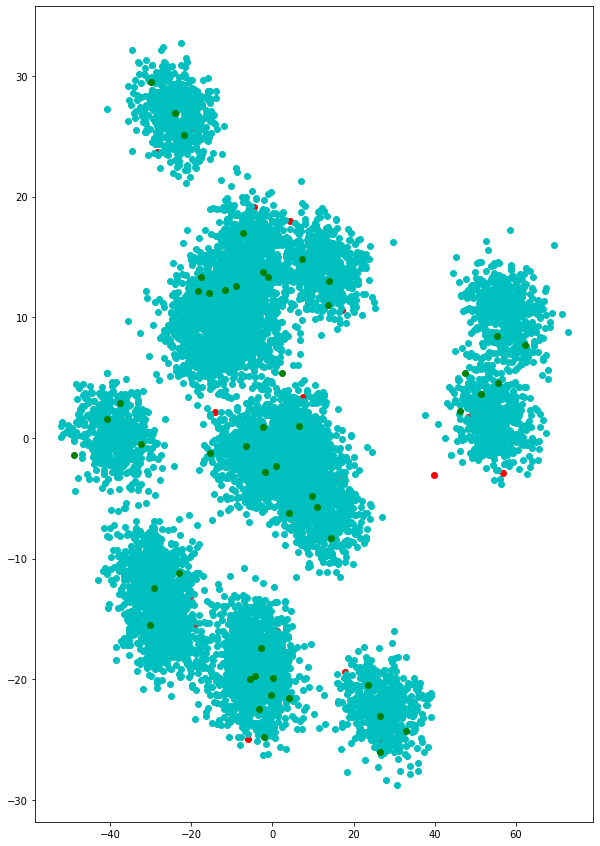

In [46]:
# สีจากของจริง
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oc')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
#plt.plot(new_pca[100:,0],new_pca[100:,1],'oc')

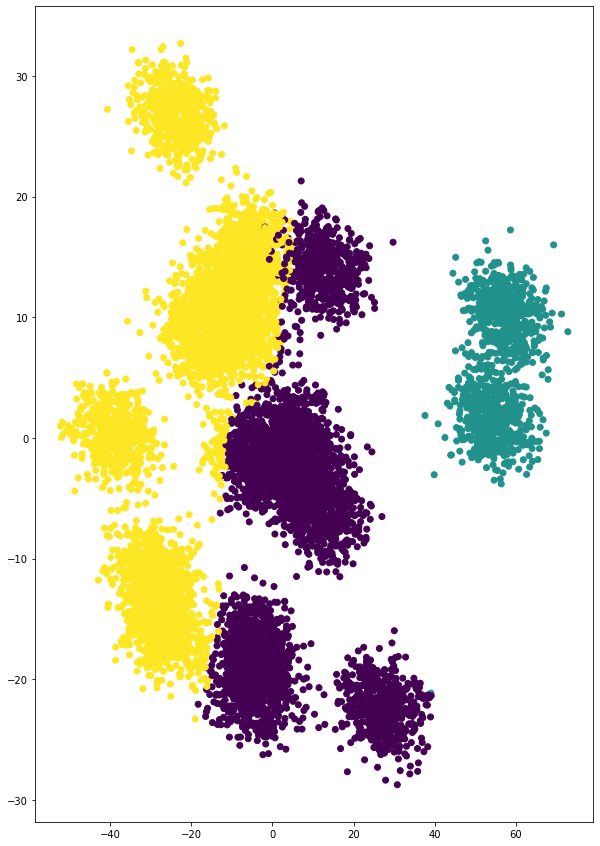

In [47]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

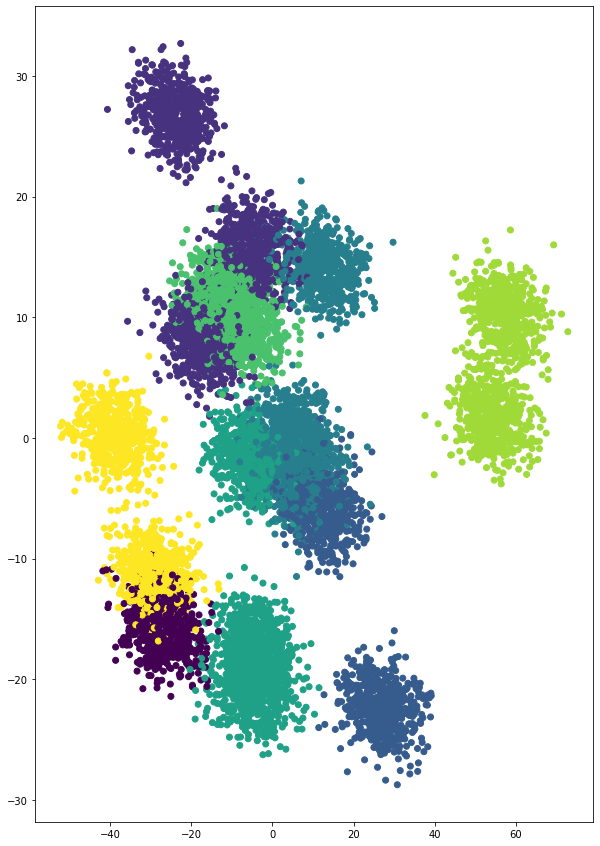

In [58]:
# plot กราฟ ในกรณีที่ใช้ค่า Default
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

In [60]:
kmeans.cluster_centers_
# แสดง จุด cluster centers ที่คำนวณออกมาได้

array([[  7.9833824 ,   8.51514474,   2.31003169,  -7.23571981,
         -7.30561158,  -2.68270495,  -7.6518023 ,   0.25913191,
         -4.77212648,  -7.76782601,  -6.25537276,  -3.55471387,
          3.40691817,  -3.78144232,   0.47797502,  -3.33331157,
         -8.27220367,  -8.19125304,  -4.93316294,  -5.67228648,
         -8.67968791,   5.53443582,  17.03028948,  29.67217909],
       [ -1.46095069,  -5.82683047,  -2.48402755,  -5.71346204,
         -2.57273305,  -1.78905794,   2.61864702,  -3.57185712,
         -4.30979406,   1.5721953 ,  -1.7865341 ,   2.53780607,
         -0.71241331,  -4.80524058,  -2.65381967,   5.52322307,
          4.01688121,  -0.27820375,   0.51415481,  -2.81049213,
          1.60812154,   4.45377903, -11.65366095,  24.26889517],
       [  8.80222107,   3.3334861 ,   5.21676254,   3.22296002,
          7.0957757 ,   6.21099284,  -2.98992148,   1.2954386 ,
         -1.16698713,   2.97739134,  -4.19969141,  -2.38520292,
         -4.80929761,   3.64070991,   

- หาจำนวนกลุ่ม หรือดูว่า ค่า K ควรจะเป็นเท่าไหร่(ค่า K ที่เหมาะสม) 

  มี 2 วิธีในการดู

  1. Elbow Method\
      คือ จะplot กราฟตามจำนวน cluster ที่เป็นไปได้โดยเทียบกับค่า SSE 
  2. Silhouette coefficient\
      คือ คำนวณว่า SSE ของจุดเทียบกับจุดศูนย์เป็นอย่างไร

# **Elbow Method**

In [51]:
kmeans.inertia_  # ทำการหาค่าของ SSE (Sum of Squared Error)

8442941.851562608

In [64]:
# วนลูปให้เปลี่ยนค่า k และให้คำนวณค่าใหม่ทุกครั้ง
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [65]:
SSE  # ค่า SSE โดยวิธี elbow mrthod

[14613739.592412937,
 10228595.5539893,
 8442941.851562608,
 7237582.683149591,
 6364528.3036553655,
 5676679.0923629245,
 5170247.626188127,
 4512254.221309073]

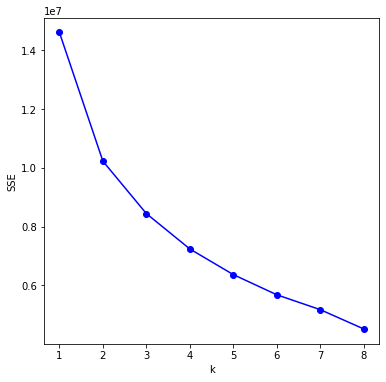

In [67]:
matplotlib.rcParams['figure.figsize'] = [6,6]   #เนื่องจากขนาดเดิมกราฟใหญ่เกินไปจงลดขนาดลง
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟจะเห็นว่า ค่า k ที่ 4 มีค่าที่เริ่มแตกต่างไปจากค่าอื่น ค่า k=4 หรือมีค่า k ทั้งหมด 4 กลุ่ม

# **Silhouette coefficient**

In [68]:
from sklearn import metrics

In [72]:
# วนลูปเปลี่ยนค่า
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

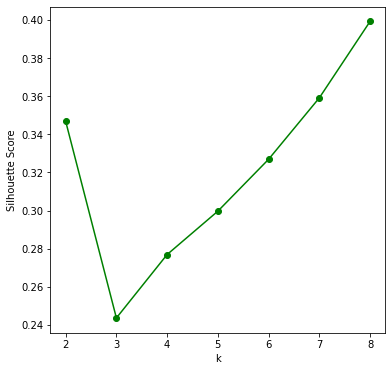

In [73]:
matplotlib.rcParams['figure.figsize'] = [6,6]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จากกราฟจะเห็นได้ว่า จุดที่มี Silhouette score สูง มีความใกล้กันของข้อมูลในจุดของกลุ่มเดียวกันมากและความห่างกันของข้อมูลในจุดมาก มีค่า k ทั้งหมด 3 กลุ่ม โดยมีระยะห่าวงที่แตกต่างกัน





In [74]:
matplotlib.rcParams['figure.figsize'] = [10,15] 
# ขยายกราฟให้ใหญ่ขึ้นเเพื่อเปรียบเทียบชัดเจน

Text(0, 0.5, 'Y')

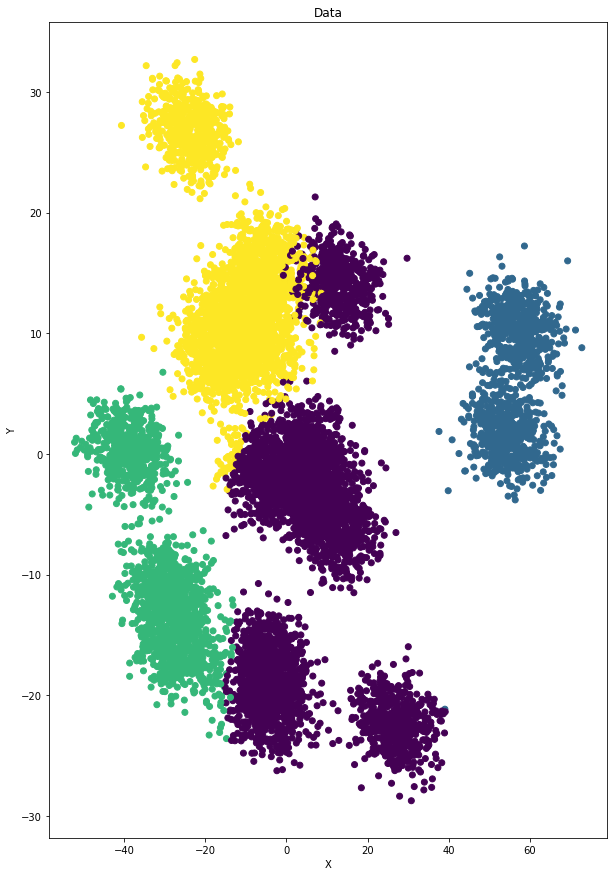

In [77]:
kmeans = KMeans(n_clusters= 4, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y')

# ทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ